In [2]:
pip install huggingface_hub

In [2]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.7 MB/s eta 0:00:00


In [1]:
%matplotlib inline
import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Audio as ipAudio
import seaborn as sns


In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
dataset_name = "mozilla-foundation/common_voice_13_0"
language = "Indonesian"
language_abbr = "id" # Short hand code for the language we want to fine-tune

In [3]:
from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()

common_voice["train"] = load_dataset(dataset_name, language_abbr, split="train+validation", use_auth_token=True)
common_voice["test"] = load_dataset(dataset_name, language_abbr, split="test", use_auth_token=True)

print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
        num_rows: 8333
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
        num_rows: 3649
    })
})


In [4]:
df_train = common_voice['train'].to_pandas()
df_test = common_voice['test'].to_pandas()

In [5]:
df_train['length'] = [0 for i in range(len(common_voice['train']))]

In [6]:
df_test['length'] = [0 for i in range(len(common_voice['test']))]

In [7]:
for i in range(len(common_voice['train'])):
  df_train['length'][i] = len(common_voice['train'][i]['audio']['array'])/48000

<ipython-input-7-dd065252a19d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['length'][i] = len(common_voice['train'][i]['audio']['array'])/48000


In [8]:
for i in range(len(common_voice['test'])):
  df_test['length'][i] = len(common_voice['test'][i]['audio']['array'])/48000

<ipython-input-8-b7cf133204a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['length'][i] = len(common_voice['test'][i]['audio']['array'])/48000


In [9]:
df_train.head()

,client_id,path,audio,sentence,up_votes,down_votes,age,gender,accent,locale,segment,variant,length
0,6ac0427a8caef565e3a800e844451a5dde7df70a144fae...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Saya mendengarkan cerita membosankan dari tema...,2,0,,,,id,,,4.464
1,6ac0427a8caef565e3a800e844451a5dde7df70a144fae...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",halo dunia!,2,0,,,,id,,,2.232
2,6ac0427a8caef565e3a800e844451a5dde7df70a144fae...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Sudah makan? sudah sholat...?,2,0,,,,id,,,3.384
3,6ac0427a8caef565e3a800e844451a5dde7df70a144fae...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",mau pergi kemana hari ini?,2,0,,,,id,,,2.664
4,6ac0427a8caef565e3a800e844451a5dde7df70a144fae...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",udah keluar hasil testnya?,2,0,,,,id,,,2.520


In [10]:
df_train['length'].sum()/3600

11.601596666666666

In [11]:
df_test.head()

,client_id,path,audio,sentence,up_votes,down_votes,age,gender,accent,locale,segment,variant,length
0,0a4e7e60acc2a6145fc2589e6abb81e41e430cea0611bd...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Maha Suci Allah.,2,0,teens,male,,id,,,5.592
1,15129dc131ed8518ab14eb4ebd1945301977a018ea0cbe...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...","Merusak, berarti membeli barang.",2,0,,,,id,,,4.248
2,19285f8e012ad31cad237d53bab348ce59a5cc13684754...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Inilah dunia kecil.,2,1,,,,id,,,2.616
3,1d4e1d0cfef0c67c55f809a40973083c61c5fead9d2040...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...","Ketika dia sampai stasiun, keretanya telah ber...",2,1,,,,id,,,4.500
4,1d5894377419894d75aeb5d430134aba34df922d300479...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Aku hanya melakukan yang selalu kulakukan.,4,0,thirties,male,"medhok,Javanese,East java",id,,,4.572


In [12]:
df_test['length'].sum()/3600

4.160431591435185

In [32]:
common_voice['train'].features

{'client_id': Value(dtype='string', id=None),
 'path': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None),
 'sentence': Value(dtype='string', id=None),
 'up_votes': Value(dtype='int64', id=None),
 'down_votes': Value(dtype='int64', id=None),
 'age': Value(dtype='string', id=None),
 'gender': Value(dtype='string', id=None),
 'accent': Value(dtype='string', id=None),
 'locale': Value(dtype='string', id=None),
 'segment': Value(dtype='string', id=None),
 'variant': Value(dtype='string', id=None)}

In [33]:
common_voice['test'].features

{'client_id': Value(dtype='string', id=None),
 'path': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None),
 'sentence': Value(dtype='string', id=None),
 'up_votes': Value(dtype='int64', id=None),
 'down_votes': Value(dtype='int64', id=None),
 'age': Value(dtype='string', id=None),
 'gender': Value(dtype='string', id=None),
 'accent': Value(dtype='string', id=None),
 'locale': Value(dtype='string', id=None),
 'segment': Value(dtype='string', id=None),
 'variant': Value(dtype='string', id=None)}

In [13]:
df_indonesian = pd.concat([df_test,df_train])

In [14]:
df_indonesian.head()

,client_id,path,audio,sentence,up_votes,down_votes,age,gender,accent,locale,segment,variant,length
0,0a4e7e60acc2a6145fc2589e6abb81e41e430cea0611bd...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Maha Suci Allah.,2,0,teens,male,,id,,,5.592
1,15129dc131ed8518ab14eb4ebd1945301977a018ea0cbe...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...","Merusak, berarti membeli barang.",2,0,,,,id,,,4.248
2,19285f8e012ad31cad237d53bab348ce59a5cc13684754...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Inilah dunia kecil.,2,1,,,,id,,,2.616
3,1d4e1d0cfef0c67c55f809a40973083c61c5fead9d2040...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...","Ketika dia sampai stasiun, keretanya telah ber...",2,1,,,,id,,,4.500
4,1d5894377419894d75aeb5d430134aba34df922d300479...,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",Aku hanya melakukan yang selalu kulakukan.,4,0,thirties,male,"medhok,Javanese,East java",id,,,4.572


In [15]:
df_indonesian['length'].sum()/3600

15.76202825810185

In [59]:
common_voice['test'][0]

{'client_id': '0a4e7e60acc2a6145fc2589e6abb81e41e430cea0611bd0c919eb1baf328f2545dd908f7a787a2cf3ff64b4412b7527b4a2dcde5c2d161941246c1c106df91c9',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/6bb944c690940a5cc6c8e82c29615d79b6a593736a533875ae720df84349f3f6/id_test_0/common_voice_id_23033570.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/6bb944c690940a5cc6c8e82c29615d79b6a593736a533875ae720df84349f3f6/id_test_0/common_voice_id_23033570.mp3',
  'array': array([ 0.00000000e+00, -1.62967187e-13, -4.52061619e-14, ...,
         -4.09781933e-05, -2.77457730e-05, -3.40642328e-06]),
  'sampling_rate': 48000},
 'sentence': 'Maha Suci Allah.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'teens',
 'gender': 'male',
 'accent': '',
 'locale': 'id',
 'segment': '',
 'variant': ''}

In [4]:
dff = pd.DataFrame.from_dict(common_voice['test'])

In [10]:
common_voice['test']=[]

In [11]:
common_voice['test']

[]

In [12]:
import gc
gc.collect()

0

In [ ]:
dff2 = pd.DataFrame.from_dict(common_voice['train'])

In [ ]:
common_voice['train']=[]

In [ ]:
dff3 = pd.concat([dff,dff2])
dff = []
dff2 = []

In [ ]:
df2 = pd.json_normalize(dff3['audio'])

In [ ]:
dff3=dff3.drop(columns=['path', 'audio'])

In [ ]:
df_head = pd.concat([dff3,df2],axis=1)

In [17]:
import numpy as np
df_indonesian=df_indonesian.replace('', np.nan)

In [18]:
df_indonesian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11982 entries, 0 to 8332
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   client_id   11982 non-null  object 
 1   path        11982 non-null  object 
 2   audio       11982 non-null  object 
 3   sentence    11982 non-null  object 
 4   up_votes    11982 non-null  int64  
 5   down_votes  11982 non-null  int64  
 6   age         8494 non-null   object 
 7   gender      8495 non-null   object 
 8   accent      215 non-null    object 
 9   locale      11982 non-null  object 
 10  segment     12 non-null     object 
 11  variant     0 non-null      float64
 12  length      11982 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


In [20]:
df_indonesian['sentence'].nunique()

11982

In [38]:
print(f"There are {df_indonesian.shape[0]} records in the Indonesian dataset")

There are 11982 records in the Indonesian dataset


Each datasets has different number of records. With the Tamil language having the highest number of records and the malayalam language having the least number of records.

As seen each dataset has three columns. The `path` column relating to the relative audio path, the `sentence` column contains the transcript and `length` column contains the length of the audio in seconds

In [72]:
# Statistics for the Audio Duration
def display_audio_stats(df):
    audio_stats = pd.DataFrame(df["length"].map(lambda x: x/1).describe()).T
    print(f"Statistik Audio")
    display(audio_stats)

In [73]:
display_audio_stats(df_indonesian)

Statistik Audio


,count,mean,std,min,25%,50%,75%,max
length,11982.0,4.735712,1.580833,1.116,3.504,4.464,5.76,10.836


In [74]:
def display_audio_hists(df):
    fig, (ax_box, ax_hist)= plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=df["length"], ax=ax_box)
    sns.histplot(data=df, x="length", kde=True, ax=ax_hist)
    #sns.despine(top=True, right=True)
    ax_box.set(xlabel='')
    ax_hist.set_xlabel("Duration in Seconds")
    #ax_hist.set_title(f"Histogram of audio duration for Indonesian datasets", size=14)
    plt.show()

In [94]:
def display_transcription_hists(df, stat_type="word"):
    fig, (ax_box, ax_hist)= plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    df_copy = df.copy()
    if stat_type == "word":
        df_copy["t_length"] = df_copy["sentence"].str.split().map(len)
    else:
        df_copy["t_length"] = df_copy["sentence"].map(len)
    sns.boxplot(x=df_copy["t_length"], ax=ax_box)
    sns.histplot(data=df_copy, x="t_length", kde=True, ax=ax_hist)
    #sns.despine(top=True, right=True)
    ax_hist.set_xlabel(f"Length of transcription in {stat_type}s")
    #ax_hist.set_title(f"Histogram of transcription length for Indonesian", size=14)
    ax_box.set(xlabel='')
    plt.show()

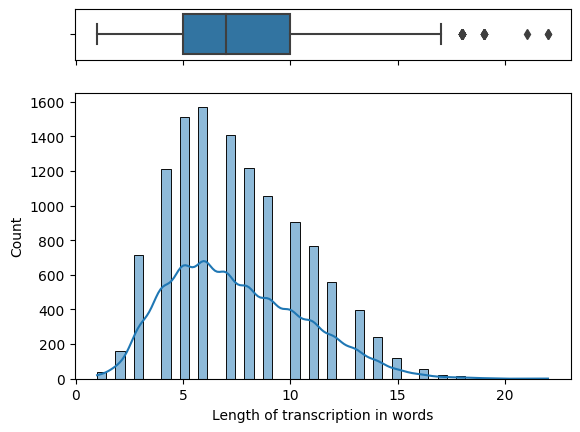

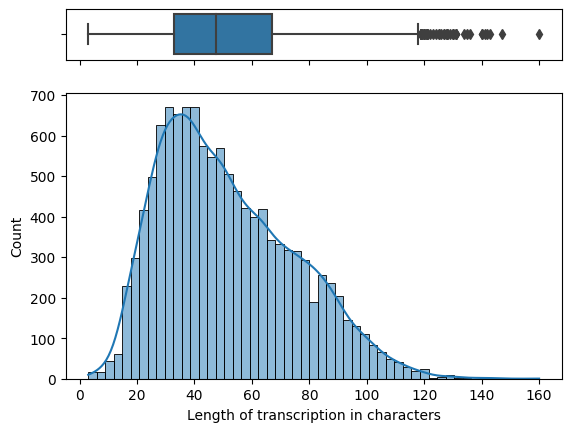

In [95]:
display_transcription_hists((df_indonesian))
display_transcription_hists((df_indonesian), stat_type="character")

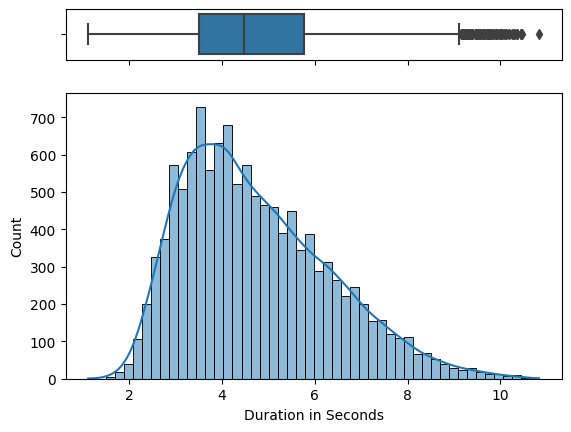

In [75]:
display_audio_hists(df_indonesian)

All the datasets are mostly left skewed in their distributions with most of the data contain short audio of less than 15 seconds. This will be useful when we truncate and pad our data for the processing through our model.

In [76]:
# Statistics for the Audio Duration
def display_transcription_stats(df):
    char_stats = pd.DataFrame(df["sentence"].map(len).describe()).T
    char_stats.index=["Character"]
    word_stats = pd.DataFrame(df["sentence"].str.split().map(len).describe()).T
    word_stats.index=["Word"]
    print(f"Transcription Statistics for Indonesian datasets")
    stats = pd.concat([char_stats, word_stats])
    display(stats)

In [77]:
display_transcription_stats(df_indonesian)

Transcription Statistics for Indonesian datasets


,count,mean,std,min,25%,50%,75%,max
Character,11982.0,51.490820,23.373344,3.0,33.0,47.5,67.0,160.0
Word,11982.0,7.489568,3.120861,1.0,5.0,7.0,10.0,22.0
